In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/TWTR.csv'  # Replace with your actual path
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values and fill them
data.fillna(method='ffill', inplace=True)

print("Data loaded and preprocessed successfully!")

# %%
# ... (rest of your code)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded and preprocessed successfully!


<ipython-input-5-2351b9e4439e>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [6]:
# Calculate daily percent change
data['Daily Change (%)'] = ((data['Close'] - data['Open']) / data['Open']) * 100

# Calculate volatility
data['Volatility (%)'] = ((data['High'] - data['Low']) / data['Open']) * 100

# Create a binary target variable for stock movement: 1 (up), 0 (down)
data['Stock Movement'] = (data['Close'] > data['Open']).astype(int)

# Drop unused columns
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily Change (%)', 'Volatility (%)', 'Stock Movement']]
data.head()


,Date,Open,High,Low,Close,Volume,Daily Change (%),Volatility (%),Stock Movement
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,117701670.0,-0.443450,13.503327,0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,27925307.0,-9.318524,13.618546,0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,16113941.0,5.925931,8.888884,1
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,6316755.0,-4.031145,4.466324,0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,8688325.0,3.826466,5.142581,1


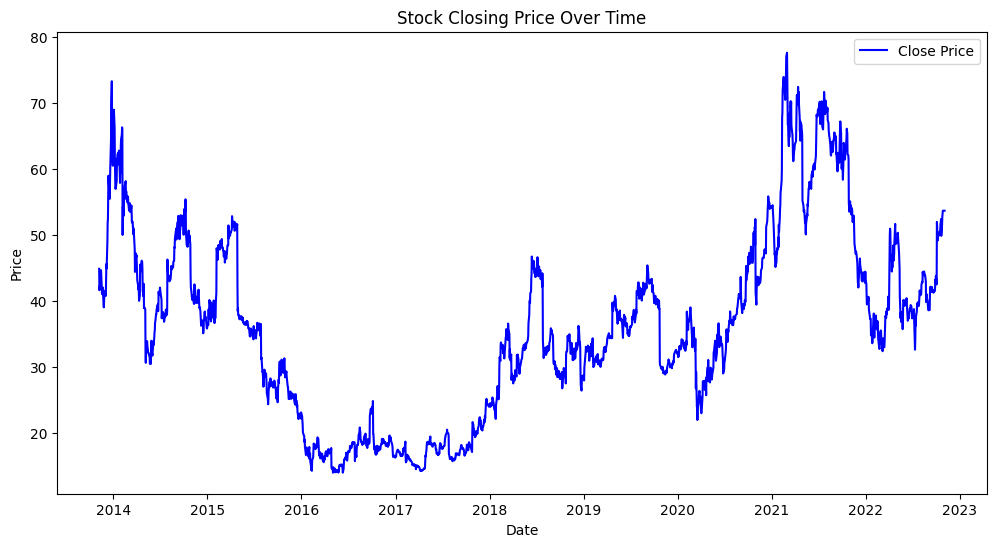

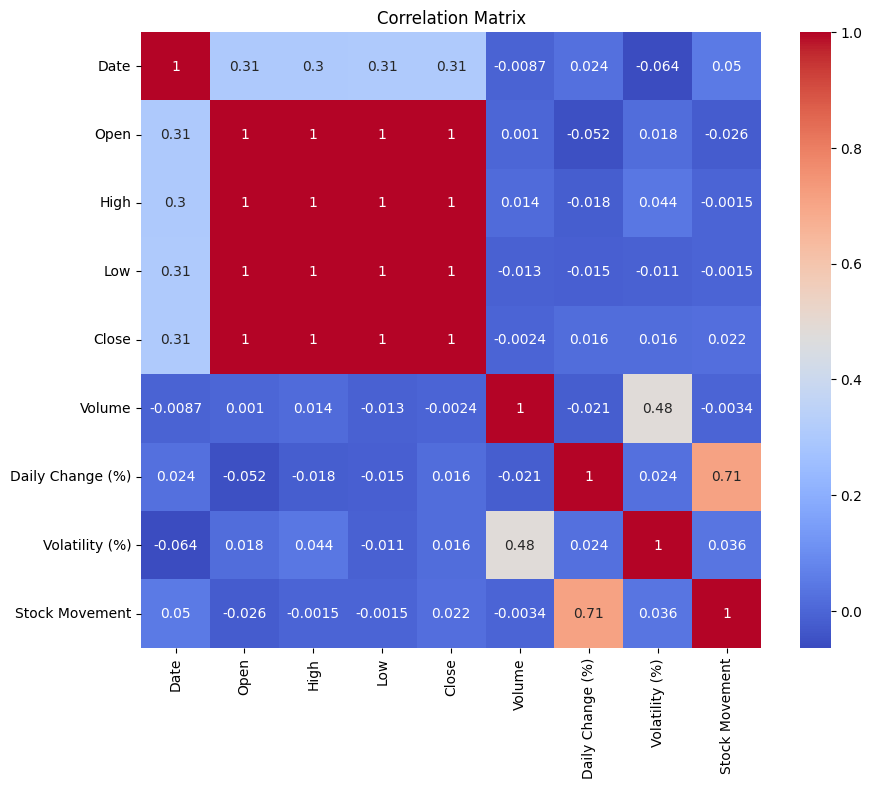

In [7]:
# Plot the stock price trends
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label="Close Price", color="blue")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [8]:
# Prepare data for modeling
features = ['Open', 'High', 'Low', 'Volume', 'Daily Change (%)', 'Volatility (%)']
X = data[features]
y = data['Stock Movement']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       238

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



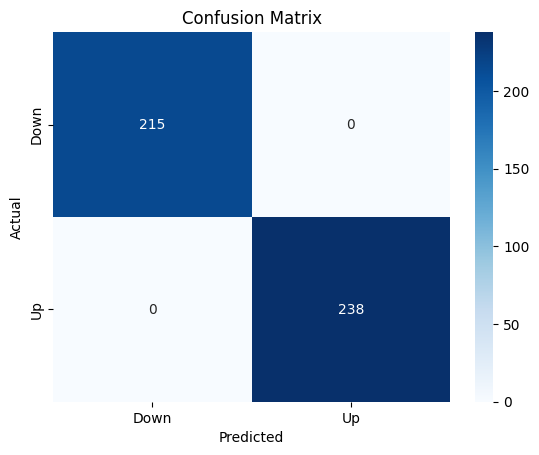

In [9]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's already loaded as 'data')
# ... (Code for loading and preprocessing data from the previous example)

# Calculate daily percent change and volatility
data['Daily Change (%)'] = ((data['Close'] - data['Open']) / data['Open']) * 100
data['Volatility (%)'] = ((data['High'] - data['Low']) / data['Open']) * 100

# Create a binary target variable for stock movement
data['Stock Movement'] = (data['Close'] > data['Open']).astype(int)

# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'Daily Change (%)', 'Volatility (%)']
X = data[features]
y = data['Stock Movement']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# ... (Code to plot confusion matrix using seaborn or matplotlib)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       238

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

